In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 경로 설정
result_path = r"C:\Users\HyeonPoong Lee\REB_GR\REB_green-remodeling-project\04_건축HUB_API_matching\result"

# 데이터 불러오기
df_title = pd.read_csv(os.path.join(result_path, "03표제부_건축HUB.csv"), low_memory=False)
df_basic = pd.read_csv(os.path.join(result_path, "기본개요_건축HUB.csv"), low_memory=False)

# 데이터 기본 정보 확인 (중복 제거 전)
print("표제부_건축HUB 데이터 크기 (중복 제거 전):", df_title.shape)
print("기본개요_건축HUB 데이터 크기 (중복 제거 전):", df_basic.shape)



# 특정 중요 컬럼들은 명시적으로 int로 변환
important_numeric_cols_title = ['naUgrndCd', 'strctCd', 'roofCd']
for col in important_numeric_cols_title:
    if col in df_title.columns:
        df_title[col] = pd.to_numeric(df_title[col], errors='coerce').astype('Int64')

important_numeric_cols_basic = ['bldgId']
for col in important_numeric_cols_basic:
    if col in df_basic.columns:
        df_basic[col] = pd.to_numeric(df_basic[col], errors='coerce').astype('Int64')

# 중복 제거
df_title_dedup = df_title.drop_duplicates()
df_basic_dedup = df_basic.drop_duplicates()

# 중복 제거 후 데이터 크기 확인
print("\n표제부_건축HUB 데이터 크기 (중복 제거 후):", df_title_dedup.shape)
print("기본개요_건축HUB 데이터 크기 (중복 제거 후):", df_basic_dedup.shape)

# 제거된 중복 행 수 계산
title_dup_count = df_title.shape[0] - df_title_dedup.shape[0]
basic_dup_count = df_basic.shape[0] - df_basic_dedup.shape[0]

print(f"\n표제부_건축HUB 중복 제거된 행 수: {title_dup_count}")
print(f"기본개요_건축HUB 중복 제거된 행 수: {basic_dup_count}")

# 중복 제거된 데이터로 업데이트
df_title = df_title_dedup
df_basic = df_basic_dedup

# 데이터 샘플 확인
print("\n표제부_건축HUB 샘플 (중복 제거 후):")
display(df_title.head())

print("\n기본개요_건축HUB 샘플 (중복 제거 후):")
display(df_basic.head())


표제부_건축HUB 데이터 크기 (중복 제거 전): (70031, 78)
기본개요_건축HUB 데이터 크기 (중복 제거 전): (74161, 32)

표제부_건축HUB 데이터 크기 (중복 제거 후): (9703, 78)
기본개요_건축HUB 데이터 크기 (중복 제거 후): (12508, 32)

표제부_건축HUB 중복 제거된 행 수: 60328
기본개요_건축HUB 중복 제거된 행 수: 61653

표제부_건축HUB 샘플 (중복 제거 후):


,rnum,platPlc,sigunguCd,bjdongCd,platGbCd,bun,ji,mgmBldrgstPk,regstrGbCd,regstrGbCdNm,...,engrGrade,engrRat,engrEpi,gnBldGrade,gnBldCert,itgBldGrade,itgBldCert,crtnDay,rserthqkDsgnApplyYn,rserthqkAblty
0,1,강원특별자치도 원주시 봉산동 836-1번지,51130,11300,0,836,1,1134124083,1,일반,...,,0.0,0.0,,0.0,,0,20221112,0,
1,2,강원특별자치도 원주시 봉산동 836-1번지,51130,11300,0,836,1,1134124082,1,일반,...,,0.0,0.0,,0.0,,0,20221112,0,
2,1,경기도 동두천시 상봉암동 162-10번지,41250,10900,0,162,10,1100111317,1,일반,...,,0.0,0.0,,0.0,,0,20220909,0,
3,1,강원특별자치도 평창군 평창읍 종부리 596-4번지,51760,25025,0,596,4,11431100228163,1,일반,...,,0.0,0.0,,0.0,,0,20221112,0,
4,2,강원특별자치도 평창군 평창읍 종부리 596-4번지,51760,25025,0,596,4,114314233,1,일반,...,,0.0,0.0,,0.0,,0,20221112,0,



기본개요_건축HUB 샘플 (중복 제거 후):


,rnum,platPlc,sigunguCd,bjdongCd,platGbCd,bun,ji,mgmBldrgstPk,mgmUpBldrgstPk,bldgId,...,naUgrndCd,naMainBun,naSubBun,jiyukCd,jiguCd,guyukCd,jiyukCdNm,jiguCdNm,guyukCdNm,crtnDay
0,1,강원특별자치도 원주시 봉산동 836-1번지,51130,11300,0,836,1,1134124083,113412380,2120042320019426,...,0,134,0,,,,,,,20221112
1,2,강원특별자치도 원주시 봉산동 836-1번지,51130,11300,0,836,1,1134124082,113412380,2120042320019425,...,0,134,0,,,,,,,20221112
2,3,강원특별자치도 원주시 봉산동 836-1번지,51130,11300,0,836,1,113412380,0,2020042320001321,...,0,134,0,1020,,,일반주거지역,,,20221112
3,1,경기도 동두천시 상봉암동 162-10번지,41250,10900,0,162,10,1100111317,0,2120042020009040,...,0,96,63,1330,,,자연녹지지역,,,20220909
4,1,강원특별자치도 평창군 평창읍 종부리 596-4번지,51760,25025,0,596,4,11431100228163,11431100228162,2120182410000083,...,0,53,0,,,,,,,20221112


In [28]:
print(df_title.columns)
print(df_basic.columns)

Index(['rnum', 'platPlc', 'sigunguCd', 'bjdongCd', 'platGbCd', 'bun', 'ji',
       'mgmBldrgstPk', 'regstrGbCd', 'regstrGbCdNm', 'regstrKindCd',
       'regstrKindCdNm', 'newPlatPlc', 'bldNm', 'splotNm', 'block', 'lot',
       'bylotCnt', 'naRoadCd', 'naBjdongCd', 'naUgrndCd', 'naMainBun',
       'naSubBun', 'dongNm', 'mainAtchGbCd', 'mainAtchGbCdNm', 'platArea',
       'archArea', 'bcRat', 'totArea', 'vlRatEstmTotArea', 'vlRat', 'strctCd',
       'strctCdNm', 'etcStrct', 'mainPurpsCd', 'mainPurpsCdNm', 'etcPurps',
       'roofCd', 'roofCdNm', 'etcRoof', 'hhldCnt', 'fmlyCnt', 'heit',
       'grndFlrCnt', 'ugrndFlrCnt', 'rideUseElvtCnt', 'emgenUseElvtCnt',
       'atchBldCnt', 'atchBldArea', 'totDongTotArea', 'indrMechUtcnt',
       'indrMechArea', 'oudrMechUtcnt', 'oudrMechArea', 'indrAutoUtcnt',
       'indrAutoArea', 'oudrAutoUtcnt', 'oudrAutoArea', 'pmsDay', 'stcnsDay',
       'useAprDay', 'pmsnoYear', 'pmsnoKikCd', 'pmsnoKikCdNm', 'pmsnoGbCd',
       'pmsnoGbCdNm', 'hoCnt', 'engrGr

In [29]:
print(df_title['mgmBldrgstPk'].value_counts()) # 표제부 mgm 9703

print(df_basic['mgmBldrgstPk'].value_counts()) #

mgmBldrgstPk
117912451         1
1134124083        1
1134124082        1
1100111317        1
11431100228163    1
                 ..
1129110189        1
11301100288172    1
113013607         1
115016274         1
12481100202941    1
Name: count, Length: 9703, dtype: int64
mgmBldrgstPk
117912451         1
1134124083        1
1134124082        1
113412380         1
1100111317        1
                 ..
11201100280293    1
11201100270852    1
1120149503        1
11201100344718    1
11201100332977    1
Name: count, Length: 12508, dtype: int64


In [ ]:
# 에너지-건물 매칭 결과 데이터 불러오기
energy_building_match_path = r"C:\Users\HyeonPoong Lee\REB_GR\REB_green-remodeling-project\01_matching_energy_buildings\result\text_matching_result_ver3.xlsx"

# 엑셀 파일 불러오기
ebd_df = pd.read_excel(energy_building_match_path)

# 데이터 컬럼 확인
print("\nebd_df 컬럼 목록:")
print(ebd_df.columns.tolist())



ebd_df 컬럼 목록:
['SEQ_NO', 'RECAP_PK', '연면적', '사용승인연도', '기관명', '건축물명', '주소', '지상', '지하', 'TOTAREA', 'BLD_NM', 'DONG_NM', 'USE_DATE', 'MGM_BLD_PK', 'MATCH_STAGE', '비고', 'EBD_COUNT', 'BD_COUNT', 'EBD_OVER_BD', 'MATCH_TOKEN_COUNT', 'ebd_unified_tokens', '건축물명_tokens', '주소_tokens', 'BLD_NM_tokens', 'DONG_NM_tokens', 'MATCHED_BLD_TOKENS', 'MATCHED_DONG_TOKENS']


In [8]:
ebd_df

,SEQ_NO,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,BD_COUNT,EBD_OVER_BD,MATCH_TOKEN_COUNT,ebd_unified_tokens,건축물명_tokens,주소_tokens,BLD_NM_tokens,DONG_NM_tokens,MATCHED_BLD_TOKENS,MATCHED_DONG_TOKENS
0,972,11110-900,10787.40,1971-04-21,감사원,본관,서울특별시 종로구 25-23,8.0,2.0,10787.40,...,5.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,974,11110-900,5458.12,1991-07-22,감사원,제2별관(제5호),서울특별시 종로구 25-23,2.0,3.0,5458.12,...,5.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,975,11110-900,4949.30,2004-11-10,감사원,제3별관(감사원 제2별관),서울특별시 종로구 삼청동 28-102,3.0,2.0,NaN,...,5.0,no,0.0,"['감사원', '제3별관', '제2별관']","['제3별관', '감사원', '제2별관']",[],NaN,NaN,[],[]
3,976,41480-189,10615.97,1999-08-26,감사원,감사교육원(감사교육원 청사),경기도 파주시,4.0,1.0,10615.97,...,4.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1861,NaN,4948.93,1987-11-09,교육부,대한민국학술원,서울특별시 서초구 반포동 94-4 학술원,3.0,1.0,NaN,...,NaN,NaN,0.0,"['학술원', '대한민국학술원']",['대한민국학술원'],['학술원'],NaN,NaN,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,10000006164722,36110-1000000000000000571160,31242.00,2012-12-17,정부청사관리본부 세종청사,정부세종청사 2동,"세종특별자치도 세종특별자치시 (어진동 3-187번지, 정부세종청사 2동 )",5.0,1.0,NaN,...,1.0,yes,0.0,"['2동', '187번지', '정부세종청사']","['정부세종청사', '2동']","['187번지', '정부세종청사', '2동']",NaN,NaN,[],[]
4190,10000006164723,36110-1000000000000000571160,4926.00,2012-12-17,정부청사관리본부 세종청사,정부세종청사 3동,"세종특별자치도 세종특별자치시 (어진동 3-187번지, 정부세종청사 3동 )",5.0,1.0,NaN,...,1.0,yes,0.0,"['187번지', '3동', '정부세종청사']","['정부세종청사', '3동']","['187번지', '정부세종청사', '3동']",NaN,NaN,[],[]
4191,10000006164724,36110-1000000000000000571160,40968.00,2012-12-17,정부청사관리본부 세종청사,정부세종청사 4동,"세종특별자치도 세종특별자치시 (어진동 3-187번지, 정부세종청사 4동 )",6.0,1.0,NaN,...,1.0,yes,0.0,"['4동', '187번지', '정부세종청사']","['정부세종청사', '4동']","['187번지', '정부세종청사', '4동']",NaN,NaN,[],[]
4192,10000006164725,36110-1000000000000000571160,54296.00,2012-12-17,정부청사관리본부 세종청사,정부세종청사 5동,"세종특별자치도 세종특별자치시 (어진동 3-187번지, 정부세종청사 5동 )",7.0,1.0,NaN,...,1.0,yes,0.0,"['5동', '187번지', '정부세종청사']","['정부세종청사', '5동']","['187번지', '정부세종청사', '5동']",NaN,NaN,[],[]


In [10]:
# 건물 데이터 불러오기
bd_data_path = r"C:\Users\HyeonPoong Lee\REB_GR\REB_green-remodeling-project\01_matching_energy_buildings\data\BD_data_all.xlsx"

# 엑셀 파일 불러오기
bd_df = pd.read_excel(bd_data_path)

# 데이터 기본 정보 확인
print("\nBD_data_all 기본 정보:")
print(f"행 수: {bd_df.shape[0]}, 열 수: {bd_df.shape[1]}")

# 데이터 컬럼 확인
print("\nbd_df 컬럼 목록:")
print(bd_df.columns.tolist())

# 데이터 샘플 확인
print("\nBD_data_all 샘플:")
display(bd_df.head())



BD_data_all 기본 정보:
행 수: 13712, 열 수: 22

bd_df 컬럼 목록:
['RECAP_PK', 'TOTAREA', 'BLD_NM', 'DONG_NM', 'USE_DATE', 'MGM_BLD_PK', 'BLD_TYPE_GB_CD', 'MGM_UPPER_BLD_PK', 'REGSTR_GB_CD', 'REGSTR_KIND_CD', 'SIGUNGU_CD', 'BJDONG_CD', 'PLAT_GB_CD', 'BUN', 'JI', 'MAIN_ATCH_GB_CD', 'MAIN_PURPS_CD', 'ETC_PURPS', 'CYEAR', 'BLD_N', 'MULTI_YN', 'CYEAR_CD']

BD_data_all 샘플:


,RECAP_PK,TOTAREA,BLD_NM,DONG_NM,USE_DATE,MGM_BLD_PK,BLD_TYPE_GB_CD,MGM_UPPER_BLD_PK,REGSTR_GB_CD,REGSTR_KIND_CD,...,PLAT_GB_CD,BUN,JI,MAIN_ATCH_GB_CD,MAIN_PURPS_CD,ETC_PURPS,CYEAR,BLD_N,MULTI_YN,CYEAR_CD
0,11110-100180009,8585.08,대학로예술극장,NaN,2008-07-03,11110-100180009,1,NaN,2,3,...,0,1,67,0.0,05000,"문화및집회시설(근린생활시설,업무시설)",2008.0,1,N,2014
1,11110-100180042,46.08,경복궁,건청궁 동행각,NaN,11110-100184288,1,11110-100180042,1,2,...,0,1,1,0.0,05000,문화및집회시설,NaN,138,Y,2014
2,11110-100180042,2785.42,경복궁,근정전 행각,NaN,11110-100198315,1,11110-100180042,1,2,...,0,1,1,0.0,05000,문화및집회시설,NaN,138,Y,2014
3,11110-100180042,195.14,경복궁,NaN,1998-12-30,11110-20680,1,11110-100180042,1,2,...,0,1,1,0.0,04000,공공근린시설,1998.0,138,Y,2014
4,11110-100180042,118.61,경복궁,원길헌,NaN,11110-100184302,1,11110-100180042,1,2,...,0,1,1,0.0,05000,문화및집회시설,NaN,138,Y,2014


In [11]:
bd_df['MGM_BLD_PK'].value_counts()


MGM_BLD_PK
52800-4852         1
11110-100180009    1
11110-100184288    1
11110-100198315    1
11110-20680        1
                  ..
11110-100184267    1
11110-100198333    1
11110-100198319    1
11110-100198323    1
11110-100205872    1
Name: count, Length: 13712, dtype: int64

## 1. new_mgm을 기존 mgm으로 변환

In [35]:
# 표제부 컬럼 확인
print("표제부(df_title) 컬럼 목록:")
print(df_title.columns)
print("\n표제부 컬럼 한글명 유추:")
title_columns = {
    'rnum': '순번', 
    'platPlc': '대지위치', 
    'sigunguCd': '시군구코드', 
    'bjdongCd': '법정동코드', 
    'platGbCd': '대지구분코드', 
    'bun': '번', 
    'ji': '지',
    'mgmBldrgstPk': '관리건축물대장PK', 
    'regstrGbCd': '대장구분코드', 
    'regstrGbCdNm': '대장구분코드명', 
    'regstrKindCd': '대장종류코드',
    'regstrKindCdNm': '대장종류코드명', 
    'newPlatPlc': '도로명대지위치', 
    'bldNm': '건물명', 
    'splotNm': '특수지명', 
    'block': '블록', 
    'lot': '로트', 
    'bylotCnt': '외필지수',
    'naRoadCd': '새주소도로코드', 
    'naBjdongCd': '새주소법정동코드', 
    'naUgrndCd': '새주소지상지하코드', 
    'naMainBun': '새주소본번', 
    'naSubBun': '새주소부번',
    'dongNm': '동명칭', 
    'mainAtchGbCd': '주부속구분코드', 
    'mainAtchGbCdNm': '주부속구분코드명', 
    'platArea': '대지면적(㎡)', 
    'archArea': '건축면적(㎡)', 
    'bcRat': '건폐율(%)', 
    'totArea': '연면적(㎡)',
    'vlRatEstmTotArea': '용적률산정연면적(㎡)', 
    'vlRat': '용적률(%)', 
    'strctCd': '구조코드', 
    'strctCdNm': '구조코드명', 
    'etcStrct': '기타구조', 
    'mainPurpsCd': '주용도코드',
    'mainPurpsCdNm': '주용도코드명', 
    'etcPurps': '기타용도', 
    'roofCd': '지붕코드', 
    'roofCdNm': '지붕코드명', 
    'etcRoof': '기타지붕', 
    'hhldCnt': '세대수(세대)',
    'fmlyCnt': '가구수(가구)', 
    'heit': '높이(m)', 
    'grndFlrCnt': '지상층수', 
    'ugrndFlrCnt': '지하층수', 
    'rideUseElvtCnt': '승용승강기수', 
    'emgenUseElvtCnt': '비상용승강기수',
    'atchBldCnt': '부속건축물수', 
    'atchBldArea': '부속건축물면적(㎡)', 
    'totDongTotArea': '총동연면적(㎡)', 
    'indrMechUtcnt': '옥내기계식대수(대)', 
    'indrMechArea': '옥내기계식면적(㎡)',
    'oudrMechUtcnt': '옥외기계식대수(대)', 
    'oudrMechArea': '옥외기계식면적(㎡)', 
    'indrAutoUtcnt': '옥내자주식대수(대)', 
    'indrAutoArea': '옥내자주식면적(㎡)', 
    'oudrAutoUtcnt': '옥외자주식대수(대)',
    'oudrAutoArea': '옥외자주식면적(㎡)', 
    'pmsDay': '허가일', 
    'stcnsDay': '착공일', 
    'useAprDay': '사용승인일', 
    'pmsnoYear': '허가번호년', 
    'pmsnoKikCd': '허가번호기관코드',
    'pmsnoKikCdNm': '허가번호기관코드명', 
    'pmsnoGbCd': '허가번호구분코드', 
    'pmsnoGbCdNm': '허가번호구분코드명', 
    'hoCnt': '호수(호)', 
    'engrGrade': '에너지효율등급',
    'engrRat': '에너지절감율', 
    'engrEpi': 'EPI점수', 
    'gnBldGrade': '친환경건축물등급', 
    'gnBldCert': '친환경건축물인증점수', 
    'itgBldGrade': '지능형건축물등급',
    'itgBldCert': '지능형건축물인증점수', 
    'crtnDay': '생성일자', 
    'rserthqkDsgnApplyYn': '내진설계적용여부', 
    'rserthqkAblty': '내진능력'
}
for k, v in title_columns.items():
    print(f"{k}: {v}")

# 한글 컬럼명으로 변경
df_title.rename(columns=title_columns, inplace=True)

# 기본개요 컬럼 확인
print("\n기본개요(df_basic) 컬럼 목록:")
print(df_basic.columns)
print("\n기본개요 컬럼 한글명 유추:")
basic_columns = {
    'rnum': '순번', 
    'platPlc': '대지위치', 
    'sigunguCd': '시군구코드', 
    'bjdongCd': '법정동코드', 
    'platGbCd': '대지구분코드', 
    'bun': '번', 
    'ji': '지',
    'mgmBldrgstPk': '관리건축물대장PK', 
    'mgmUpBldrgstPk': '관리상위건축물대장PK', 
    'bldgId': '건물_아이디', 
    'regstrGbCd': '대장구분코드', 
    'regstrGbCdNm': '대장구분코드명',
    'regstrKindCd': '대장종류코드', 
    'regstrKindCdNm': '대장종류코드명', 
    'newPlatPlc': '도로명대지위치', 
    'bldNm': '건물명', 
    'splotNm': '특수지명', 
    'block': '블록',
    'lot': '로트', 
    'bylotCnt': '외필지수', 
    'naRoadCd': '새주소도로코드', 
    'naBjdongCd': '새주소법정동코드', 
    'naUgrndCd': '새주소지상지하코드', 
    'naMainBun': '새주소본번',
    'naSubBun': '새주소부번', 
    'jiyukCd': '지역코드', 
    'jiguCd': '지구코드', 
    'guyukCd': '구역코드', 
    'jiyukCdNm': '지역코드명', 
    'jiguCdNm': '지구코드명', 
    'guyukCdNm': '구역코드명',
    'crtnDay': '생성일자'
}
for k, v in basic_columns.items():
    print(f"{k}: {v}")

# 한글 컬럼명으로 변경
df_basic.rename(columns=basic_columns, inplace=True)

표제부(df_title) 컬럼 목록:
Index(['rnum', 'platPlc', 'sigunguCd', 'bjdongCd', 'platGbCd', 'bun', 'ji',
       'mgmBldrgstPk', 'regstrGbCd', 'regstrGbCdNm', 'regstrKindCd',
       'regstrKindCdNm', 'newPlatPlc', 'bldNm', 'splotNm', 'block', 'lot',
       'bylotCnt', 'naRoadCd', 'naBjdongCd', 'naUgrndCd', 'naMainBun',
       'naSubBun', 'dongNm', 'mainAtchGbCd', 'mainAtchGbCdNm', 'platArea',
       'archArea', 'bcRat', 'totArea', 'vlRatEstmTotArea', 'vlRat', 'strctCd',
       'strctCdNm', 'etcStrct', 'mainPurpsCd', 'mainPurpsCdNm', 'etcPurps',
       'roofCd', 'roofCdNm', 'etcRoof', 'hhldCnt', 'fmlyCnt', 'heit',
       'grndFlrCnt', 'ugrndFlrCnt', 'rideUseElvtCnt', 'emgenUseElvtCnt',
       'atchBldCnt', 'atchBldArea', 'totDongTotArea', 'indrMechUtcnt',
       'indrMechArea', 'oudrMechUtcnt', 'oudrMechArea', 'indrAutoUtcnt',
       'indrAutoArea', 'oudrAutoUtcnt', 'oudrAutoArea', 'pmsDay', 'stcnsDay',
       'useAprDay', 'pmsnoYear', 'pmsnoKikCd', 'pmsnoKikCdNm', 'pmsnoGbCd',
       'pmsnoGbCd

In [36]:
print(df_title.columns)
print(df_basic.columns)

Index(['순번', '대지위치', '시군구코드', '법정동코드', '대지구분코드', '번', '지', '관리건축물대장PK',
       '대장구분코드', '대장구분코드명', '대장종류코드', '대장종류코드명', '도로명대지위치', '건물명', '특수지명',
       '블록', '로트', '외필지수', '새주소도로코드', '새주소법정동코드', '새주소지상지하코드', '새주소본번',
       '새주소부번', '동명칭', '주부속구분코드', '주부속구분코드명', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)',
       '연면적(㎡)', '용적률산정연면적(㎡)', '용적률(%)', '구조코드', '구조코드명', '기타구조', '주용도코드',
       '주용도코드명', '기타용도', '지붕코드', '지붕코드명', '기타지붕', '세대수(세대)', '가구수(가구)',
       '높이(m)', '지상층수', '지하층수', '승용승강기수', '비상용승강기수', '부속건축물수', '부속건축물면적(㎡)',
       '총동연면적(㎡)', '옥내기계식대수(대)', '옥내기계식면적(㎡)', '옥외기계식대수(대)', '옥외기계식면적(㎡)',
       '옥내자주식대수(대)', '옥내자주식면적(㎡)', '옥외자주식대수(대)', '옥외자주식면적(㎡)', '허가일', '착공일',
       '사용승인일', '허가번호년', '허가번호기관코드', '허가번호기관코드명', '허가번호구분코드', '허가번호구분코드명',
       '호수(호)', '에너지효율등급', '에너지절감율', 'EPI점수', '친환경건축물등급', '친환경건축물인증점수',
       '지능형건축물등급', '지능형건축물인증점수', '생성일자', '내진설계적용여부', '내진능력'],
      dtype='object')
Index(['순번', '대지위치', '시군구코드', '법정동코드', '대지구분코드', '번', '지', '관리건축물대장PK',
       '관리상위건축물대장PK', '

In [37]:
# mgmBldrgstPk 변수의 길이 분포 확인
df_title['mgmBldrgstPk'].astype(str).str.len().value_counts().sort_index().plot(kind='bar')
plt.title('mgmBldrgstPk 길이 분포')
plt.xlabel('문자열 길이')
plt.ylabel('빈도수')
plt.show()

# 길이별 분포 수치로 확인
length_counts = df_title['mgmBldrgstPk'].astype(str).str.len().value_counts().sort_index()
print("mgmBldrgstPk 길이 분포:")
print(length_counts)

# 샘플 데이터 확인
print("\n길이별 샘플 데이터:")
for length in length_counts.index:
    sample = df_title[df_title['mgmBldrgstPk'].astype(str).str.len() == length]['mgmBldrgstPk'].iloc[0]
    print(f"길이 {length}: {sample}")

# 원본 데이터프레임도 표시
df_title.head()

KeyError: 'mgmBldrgstPk'

c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
 

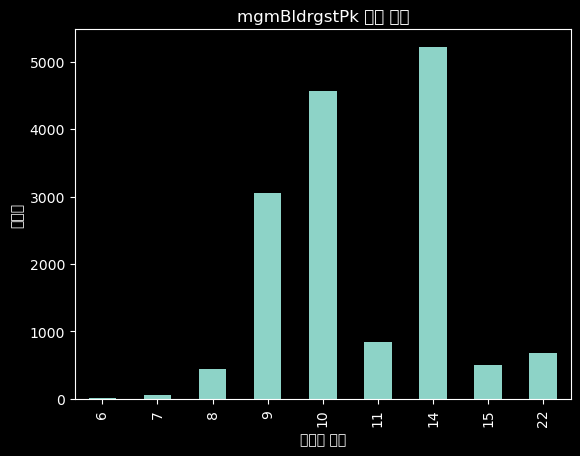

mgmBldrgstPk 길이 분포:
mgmBldrgstPk
6        8
7       55
8      450
9     3048
10    4565
11     838
14    5216
15     504
22     681
Name: count, dtype: int64

길이별 샘플 데이터:
길이 6: 109315
길이 7: 1140133
길이 8: 11001679
길이 9: 113412380
길이 10: 1134124083
길이 11: 10931126450
길이 14: 11431100228163
길이 15: 115212000020792
길이 22: 1000000000000002510944


,rnum,platPlc,sigunguCd,bjdongCd,platGbCd,bun,ji,mgmBldrgstPk,mgmUpBldrgstPk,bldgId,...,naUgrndCd,naMainBun,naSubBun,jiyukCd,jiguCd,guyukCd,jiyukCdNm,jiguCdNm,guyukCdNm,crtnDay
0,1,강원특별자치도 원주시 봉산동 836-1번지,51130,11300,0,836,1,1134124083,113412380,2120042320019426,...,0,134,0,,,,,,,20221112
1,2,강원특별자치도 원주시 봉산동 836-1번지,51130,11300,0,836,1,1134124082,113412380,2120042320019425,...,0,134,0,,,,,,,20221112
2,3,강원특별자치도 원주시 봉산동 836-1번지,51130,11300,0,836,1,113412380,0,2020042320001321,...,0,134,0,1020,,,일반주거지역,,,20221112
3,1,경기도 동두천시 상봉암동 162-10번지,41250,10900,0,162,10,1100111317,0,2120042020009040,...,0,96,63,1330,,,자연녹지지역,,,20220909
4,1,강원특별자치도 평창군 평창읍 종부리 596-4번지,51760,25025,0,596,4,11431100228163,11431100228162,2120182410000083,...,0,53,0,,,,,,,20221112


In [14]:
# mgmBldrgstPk 변수의 길이 분포 확인
df_basic['mgmBldrgstPk'].astype(str).str.len().value_counts().sort_index().plot(kind='bar')
plt.title('mgmBldrgstPk 길이 분포')
plt.xlabel('문자열 길이')
plt.ylabel('빈도수')
plt.show()

# 길이별 분포 수치로 확인
length_counts = df_basic['mgmBldrgstPk'].astype(str).str.len().value_counts().sort_index()
print("mgmBldrgstPk 길이 분포:")
print(length_counts)

# 샘플 데이터 확인
print("\n길이별 샘플 데이터:")
for length in length_counts.index:
    sample = df_basic[df_basic['mgmBldrgstPk'].astype(str).str.len() == length]['mgmBldrgstPk'].iloc[0]
    print(f"길이 {length}: {sample}")

# 원본 데이터프레임도 표시
df_basic.head()

c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
 

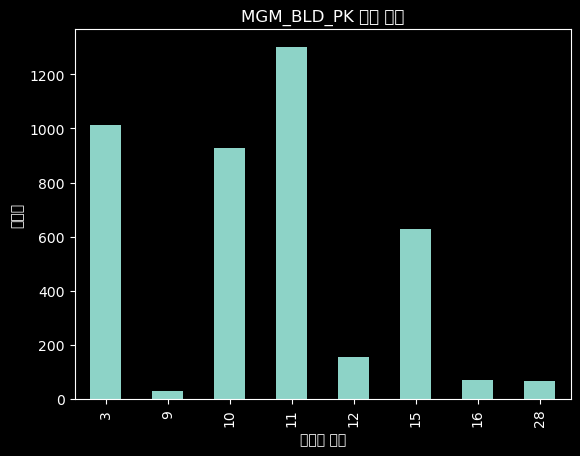

MGM_BLD_PK 길이 분포:
MGM_BLD_PK
3     1014
9       30
10     928
11    1301
12     156
15     628
16      71
28      66
Name: count, dtype: int64

길이별 샘플 데이터:
길이 3: nan
길이 9: 51110-775
길이 10: 11110-2450
길이 11: 27260-12720
길이 12: 41115-169705
길이 15: 30200-100214446
길이 16: 48127-1000030458
길이 28: 27290-1000000000000000887009


,SEQ_NO,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,BD_COUNT,EBD_OVER_BD,MATCH_TOKEN_COUNT,ebd_unified_tokens,건축물명_tokens,주소_tokens,BLD_NM_tokens,DONG_NM_tokens,MATCHED_BLD_TOKENS,MATCHED_DONG_TOKENS
0,972,11110-900,10787.40,1971-04-21,감사원,본관,서울특별시 종로구 25-23,8.0,2.0,10787.40,...,5.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,974,11110-900,5458.12,1991-07-22,감사원,제2별관(제5호),서울특별시 종로구 25-23,2.0,3.0,5458.12,...,5.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,975,11110-900,4949.30,2004-11-10,감사원,제3별관(감사원 제2별관),서울특별시 종로구 삼청동 28-102,3.0,2.0,NaN,...,5.0,no,0.0,"['감사원', '제3별관', '제2별관']","['제3별관', '감사원', '제2별관']",[],NaN,NaN,[],[]
3,976,41480-189,10615.97,1999-08-26,감사원,감사교육원(감사교육원 청사),경기도 파주시,4.0,1.0,10615.97,...,4.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1861,NaN,4948.93,1987-11-09,교육부,대한민국학술원,서울특별시 서초구 반포동 94-4 학술원,3.0,1.0,NaN,...,NaN,NaN,0.0,"['학술원', '대한민국학술원']",['대한민국학술원'],['학술원'],NaN,NaN,[],[]


In [38]:
# MGM_BLD_PK 변수의 길이 분포 확인 51130-24083	
ebd_df['MGM_BLD_PK'].astype(str).str.len().value_counts().sort_index().plot(kind='bar')
plt.title('MGM_BLD_PK 길이 분포')
plt.xlabel('문자열 길이')
plt.ylabel('빈도수')
plt.show()

# 길이별 분포 수치로 확인
length_counts = ebd_df['MGM_BLD_PK'].astype(str).str.len().value_counts().sort_index()
print("MGM_BLD_PK 길이 분포:")
print(length_counts)

# 샘플 데이터 확인
print("\n길이별 샘플 데이터:")
for length in length_counts.index:
    sample = ebd_df[ebd_df['MGM_BLD_PK'].astype(str).str.len() == length]['MGM_BLD_PK'].iloc[0]
    print(f"길이 {length}: {sample}")

# 원본 데이터프레임도 표시
ebd_df.head()

- 22이상이면 일련번호로만 구성된 특이 케이스인 것 식별함

c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
 

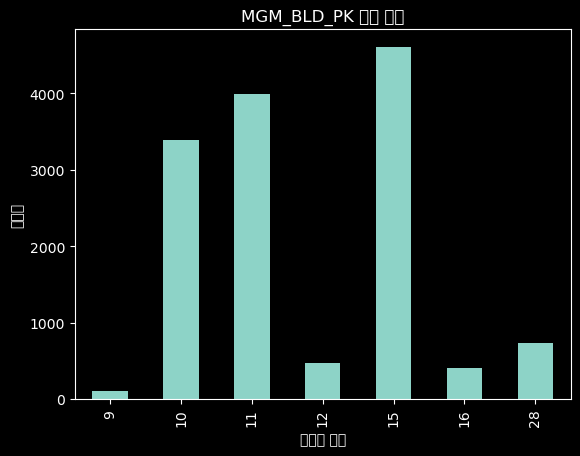

MGM_BLD_PK 길이 분포:
MGM_BLD_PK
9      109
10    3388
11    3999
12     468
15    4609
16     406
28     733
Name: count, dtype: int64

길이별 샘플 데이터:
길이 9: 11170-860
길이 10: 11110-1868
길이 11: 11110-20680
길이 12: 41115-174512
길이 15: 11110-100180009
길이 16: 36110-1000026594
길이 28: 11110-1000000000000003704379


,RECAP_PK,TOTAREA,BLD_NM,DONG_NM,USE_DATE,MGM_BLD_PK,BLD_TYPE_GB_CD,MGM_UPPER_BLD_PK,REGSTR_GB_CD,REGSTR_KIND_CD,...,PLAT_GB_CD,BUN,JI,MAIN_ATCH_GB_CD,MAIN_PURPS_CD,ETC_PURPS,CYEAR,BLD_N,MULTI_YN,CYEAR_CD
0,11110-100180009,8585.08,대학로예술극장,NaN,2008-07-03,11110-100180009,1,NaN,2,3,...,0,1,67,0.0,05000,"문화및집회시설(근린생활시설,업무시설)",2008.0,1,N,2014
1,11110-100180042,46.08,경복궁,건청궁 동행각,NaN,11110-100184288,1,11110-100180042,1,2,...,0,1,1,0.0,05000,문화및집회시설,NaN,138,Y,2014
2,11110-100180042,2785.42,경복궁,근정전 행각,NaN,11110-100198315,1,11110-100180042,1,2,...,0,1,1,0.0,05000,문화및집회시설,NaN,138,Y,2014
3,11110-100180042,195.14,경복궁,NaN,1998-12-30,11110-20680,1,11110-100180042,1,2,...,0,1,1,0.0,04000,공공근린시설,1998.0,138,Y,2014
4,11110-100180042,118.61,경복궁,원길헌,NaN,11110-100184302,1,11110-100180042,1,2,...,0,1,1,0.0,05000,문화및집회시설,NaN,138,Y,2014


In [40]:
# MGM_BLD_PK 변수의 길이 분포 확인 51130-24083	
bd_df['MGM_BLD_PK'].astype(str).str.len().value_counts().sort_index().plot(kind='bar')
plt.title('MGM_BLD_PK 길이 분포')
plt.xlabel('문자열 길이')
plt.ylabel('빈도수')
plt.show()

# 길이별 분포 수치로 확인
length_counts = bd_df['MGM_BLD_PK'].astype(str).str.len().value_counts().sort_index()
print("MGM_BLD_PK 길이 분포:")
print(length_counts)

# 샘플 데이터 확인
print("\n길이별 샘플 데이터:")
for length in length_counts.index:
    sample = bd_df[bd_df['MGM_BLD_PK'].astype(str).str.len() == length]['MGM_BLD_PK'].iloc[0]
    print(f"길이 {length}: {sample}")

# 원본 데이터프레임도 표시
bd_df.head()

## 2. new_mgm 변환

In [44]:
print(df_basic.columns)
print(df_title.columns)

Index(['순번', '대지위치', '시군구코드', '법정동코드', '대지구분코드', '번', '지', '관리건축물대장PK',
       '관리상위건축물대장PK', '건물_아이디', '대장구분코드', '대장구분코드명', '대장종류코드', '대장종류코드명',
       '도로명대지위치', '건물명', '특수지명', '블록', '로트', '외필지수', '새주소도로코드', '새주소법정동코드',
       '새주소지상지하코드', '새주소본번', '새주소부번', '지역코드', '지구코드', '구역코드', '지역코드명', '지구코드명',
       '구역코드명', '생성일자'],
      dtype='object')
Index(['순번', '대지위치', '시군구코드', '법정동코드', '대지구분코드', '번', '지', '관리건축물대장PK',
       '대장구분코드', '대장구분코드명', '대장종류코드', '대장종류코드명', '도로명대지위치', '건물명', '특수지명',
       '블록', '로트', '외필지수', '새주소도로코드', '새주소법정동코드', '새주소지상지하코드', '새주소본번',
       '새주소부번', '동명칭', '주부속구분코드', '주부속구분코드명', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)',
       '연면적(㎡)', '용적률산정연면적(㎡)', '용적률(%)', '구조코드', '구조코드명', '기타구조', '주용도코드',
       '주용도코드명', '기타용도', '지붕코드', '지붕코드명', '기타지붕', '세대수(세대)', '가구수(가구)',
       '높이(m)', '지상층수', '지하층수', '승용승강기수', '비상용승강기수', '부속건축물수', '부속건축물면적(㎡)',
       '총동연면적(㎡)', '옥내기계식대수(대)', '옥내기계식면적(㎡)', '옥외기계식대수(대)', '옥외기계식면적(㎡)',
       '옥내자주식대수(대)', '옥내자주식면적(㎡)', '옥외자주식대수(대)', '옥외자주

In [57]:
print(df_basic['대장구분코드'].value_counts())
print(df_basic['대장구분코드명'].value_counts())
print(df_basic['대장종류코드'].value_counts())
print(df_basic['대장종류코드명'].value_counts())


대장구분코드
1    10924
2     1584
Name: count, dtype: int64
대장구분코드명
일반    10924
집합     1584
Name: count, dtype: int64
대장종류코드
2    9914
4    1506
1    1019
3      69
Name: count, dtype: int64
대장종류코드명
일반건축물    9914
전유부      1506
총괄표제부    1019
표제부        69
Name: count, dtype: int64


In [56]:
print(df_title['대장구분코드'].value_counts())
print(df_title['대장구분코드명'].value_counts())
print(df_title['대장종류코드'].value_counts())
print(df_title['대장종류코드명'].value_counts())


대장구분코드
1    9593
2     110
Name: count, dtype: int64
대장구분코드명
일반    9593
집합     110
Name: count, dtype: int64
대장종류코드
2    9593
3     110
Name: count, dtype: int64
대장종류코드명
일반건축물    9593
표제부       110
Name: count, dtype: int64


In [50]:
print(ebd_df.columns)
print(bd_df.columns)


Index(['SEQ_NO', 'RECAP_PK', '연면적', '사용승인연도', '기관명', '건축물명', '주소', '지상', '지하',
       'TOTAREA', 'BLD_NM', 'DONG_NM', 'USE_DATE', 'MGM_BLD_PK', 'MATCH_STAGE',
       '비고', 'EBD_COUNT', 'BD_COUNT', 'EBD_OVER_BD', 'MATCH_TOKEN_COUNT',
       'ebd_unified_tokens', '건축물명_tokens', '주소_tokens', 'BLD_NM_tokens',
       'DONG_NM_tokens', 'MATCHED_BLD_TOKENS', 'MATCHED_DONG_TOKENS'],
      dtype='object')
Index(['RECAP_PK', 'TOTAREA', 'BLD_NM', 'DONG_NM', 'USE_DATE', 'MGM_BLD_PK',
       'BLD_TYPE_GB_CD', 'MGM_UPPER_BLD_PK', 'REGSTR_GB_CD', 'REGSTR_KIND_CD',
       'SIGUNGU_CD', 'BJDONG_CD', 'PLAT_GB_CD', 'BUN', 'JI', 'MAIN_ATCH_GB_CD',
       'MAIN_PURPS_CD', 'ETC_PURPS', 'CYEAR', 'BLD_N', 'MULTI_YN', 'CYEAR_CD'],
      dtype='object')


In [ ]:
print(bd_df['BLD_TYPE_GB_CD'].value_counts())
print(bd_df['REGSTR_GB_CD'].value_counts())
print(bd_df['REGSTR_KIND_CD'].value_counts())



BLD_TYPE_GB_CD
1    13712
Name: count, dtype: int64
REGSTR_GB_CD
1    13592
2      120
Name: count, dtype: int64
REGSTR_KIND_CD
2    13592
3      120
Name: count, dtype: int64


In [51]:
ebd_df['MATCH_STAGE'].value_counts()


MATCH_STAGE
1차              1585
3차               714
미매칭              666
4차(DONG일치)       538
미매칭(RECAP없음)     256
2차               196
4차(BLD일치)        141
미매칭(후보없음)         92
수동매칭(1차중복)         2
수동매칭(DONG일치)       2
미매칭(수동)            1
수동매칭(2차중복)         1
Name: count, dtype: int64

In [45]:
# df_basic에 MGM_BLD_PK 변수 생성
df_basic['MGM_BLD_PK'] = df_basic.apply(
    lambda row: f"{row['시군구코드']}-{str(row['관리건축물대장PK'])[5:]}" 
    if len(str(row['관리건축물대장PK'])) < 22 
    else f"{row['시군구코드']}-{row['관리건축물대장PK']}", 
    axis=1
)

# df_title에 MGM_BLD_PK 변수 생성
df_title['MGM_BLD_PK'] = df_title.apply(
    lambda row: f"{row['시군구코드']}-{str(row['관리건축물대장PK'])[5:]}" 
    if len(str(row['관리건축물대장PK'])) < 22 
    else f"{row['시군구코드']}-{row['관리건축물대장PK']}", 
    axis=1
)

# 결과 확인
print("df_basic의 MGM_BLD_PK 샘플:")
print(df_basic[['시군구코드', '관리건축물대장PK', 'MGM_BLD_PK']].head())

print("\ndf_title의 MGM_BLD_PK 샘플:")
print(df_title[['시군구코드', '관리건축물대장PK', 'MGM_BLD_PK']].head())

df_basic의 MGM_BLD_PK 샘플:
   시군구코드       관리건축물대장PK       MGM_BLD_PK
0  51130      1134124083      51130-24083
1  51130      1134124082      51130-24082
2  51130       113412380       51130-2380
3  41250      1100111317      41250-11317
4  51760  11431100228163  51760-100228163

df_title의 MGM_BLD_PK 샘플:
   시군구코드       관리건축물대장PK       MGM_BLD_PK
0  51130      1134124083      51130-24083
1  51130      1134124082      51130-24082
2  41250      1100111317      41250-11317
3  51760  11431100228163  51760-100228163
4  51760       114314233       51760-4233


In [46]:
# bd_df와 df_basic, df_title의 MGM_BLD_PK 일치 여부 확인

# bd_df의 MGM_BLD_PK 목록 가져오기
bd_mgm_pks = set(bd_df['MGM_BLD_PK'].astype(str))

# df_basic과 bd_df의 MGM_BLD_PK 일치 확인
basic_match_count = sum(df_basic['MGM_BLD_PK'].isin(bd_mgm_pks))
basic_total_count = len(df_basic)
basic_match_percent = (basic_match_count / basic_total_count) * 100 if basic_total_count > 0 else 0

# df_title과 bd_df의 MGM_BLD_PK 일치 확인
title_match_count = sum(df_title['MGM_BLD_PK'].isin(bd_mgm_pks))
title_total_count = len(df_title)
title_match_percent = (title_match_count / title_total_count) * 100 if title_total_count > 0 else 0

# 결과 출력
print("\nbd_df와 df_basic의 MGM_BLD_PK 일치 여부:")
print(f"일치하는 건수: {basic_match_count} / {basic_total_count} ({basic_match_percent:.2f}%)")

print("\nbd_df와 df_title의 MGM_BLD_PK 일치 여부:")
print(f"일치하는 건수: {title_match_count} / {title_total_count} ({title_match_percent:.2f}%)")

# 일치하는 MGM_BLD_PK 샘플 확인 (최대 5개)
print("\n일치하는 MGM_BLD_PK 샘플 (df_basic):")
matching_basic = df_basic[df_basic['MGM_BLD_PK'].isin(bd_mgm_pks)]['MGM_BLD_PK'].head()
for idx, mgm_pk in enumerate(matching_basic, 1):
    print(f"{idx}. {mgm_pk}")

print("\n일치하는 MGM_BLD_PK 샘플 (df_title):")
matching_title = df_title[df_title['MGM_BLD_PK'].isin(bd_mgm_pks)]['MGM_BLD_PK'].head()
for idx, mgm_pk in enumerate(matching_title, 1):
    print(f"{idx}. {mgm_pk}")



bd_df와 df_basic의 MGM_BLD_PK 일치 여부:
일치하는 건수: 9705 / 12508 (77.59%)

bd_df와 df_title의 MGM_BLD_PK 일치 여부:
일치하는 건수: 9430 / 9703 (97.19%)

일치하는 MGM_BLD_PK 샘플 (df_basic):
1. 51130-24083
2. 51130-24082
3. 41250-11317
4. 51760-100228163
5. 51760-4233

일치하는 MGM_BLD_PK 샘플 (df_title):
1. 51130-24083
2. 51130-24082
3. 41250-11317
4. 51760-100228163
5. 51760-4233


In [47]:
# df_basic과 df_title 모두에서 일치하는 MGM_BLD_PK 찾기
basic_matching_pks = set(df_basic[df_basic['MGM_BLD_PK'].isin(bd_mgm_pks)]['MGM_BLD_PK'])
title_matching_pks = set(df_title[df_title['MGM_BLD_PK'].isin(bd_mgm_pks)]['MGM_BLD_PK'])

# 두 데이터프레임 모두에서 일치하는 MGM_BLD_PK 찾기
common_matching_pks = basic_matching_pks.intersection(title_matching_pks)

# 결과 출력
print(f"\ndf_basic과 df_title 모두에서 일치하는 MGM_BLD_PK 개수: {len(common_matching_pks)}")

# 공통 일치 MGM_BLD_PK 샘플 출력 (최대 5개)
print("\ndf_basic과 df_title 모두에서 일치하는 MGM_BLD_PK 샘플:")
for idx, mgm_pk in enumerate(list(common_matching_pks)[:5], 1):
    print(f"{idx}. {mgm_pk}")

# 일치율 계산
common_match_percent_basic = (len(common_matching_pks) / basic_total_count) * 100 if basic_total_count > 0 else 0
common_match_percent_title = (len(common_matching_pks) / title_total_count) * 100 if title_total_count > 0 else 0

print(f"\ndf_basic 기준 공통 일치율: {common_match_percent_basic:.2f}%")
print(f"df_title 기준 공통 일치율: {common_match_percent_title:.2f}%")



df_basic과 df_title 모두에서 일치하는 MGM_BLD_PK 개수: 9176

df_basic과 df_title 모두에서 일치하는 MGM_BLD_PK 샘플:
1. 11110-100190987
2. 31110-15017
3. 52140-100171809
4. 26470-4299
5. 51750-3946

df_basic 기준 공통 일치율: 73.36%
df_title 기준 공통 일치율: 94.57%


In [ ]:
# MGM_BLD_PK가 df_basic 혹은 df_title에는 있지만 bd_df에는 없는 경우 파악하기

# df_basic과 df_title의 모든 MGM_BLD_PK 가져오기
basic_all_pks = set(df_basic['MGM_BLD_PK'].dropna())
title_all_pks = set(df_title['MGM_BLD_PK'].dropna())
bd_all_pks = set(bd_df['MGM_BLD_PK'].dropna())

# df_basic에는 있지만 bd_df에는 없는 MGM_BLD_PK
basic_only_pks = basic_all_pks - bd_all_pks
# df_title에는 있지만 bd_df에는 없는 MGM_BLD_PK
title_only_pks = title_all_pks - bd_all_pks
# df_basic 또는 df_title에는 있지만 bd_df에는 없는 MGM_BLD_PK (합집합)
all_missing_pks = basic_only_pks.union(title_only_pks)

# 결과 출력
print(f"\ndf_basic에는 있지만 bd_df에는 없는 MGM_BLD_PK 개수: {len(basic_only_pks)}")
print(f"df_title에는 있지만 bd_df에는 없는 MGM_BLD_PK 개수: {len(title_only_pks)}")
print(f"df_basic 또는 df_title에는 있지만 bd_df에는 없는 MGM_BLD_PK 개수: {len(all_missing_pks)}")

# 샘플 출력 (각 카테고리별 최대 5개)
print("\ndf_basic에만 있는 MGM_BLD_PK 샘플:")
for idx, mgm_pk in enumerate(list(basic_only_pks)[:5], 1):
    print(f"{idx}. {mgm_pk}")

print("\ndf_title에만 있는 MGM_BLD_PK 샘플:")
for idx, mgm_pk in enumerate(list(title_only_pks)[:5], 1):
    print(f"{idx}. {mgm_pk}")

# 비율 계산
basic_missing_ratio = (len(basic_only_pks) / len(basic_all_pks)) * 100 if len(basic_all_pks) > 0 else 0
title_missing_ratio = (len(title_only_pks) / len(title_all_pks)) * 100 if len(title_all_pks) > 0 else 0

print(f"\ndf_basic 중 bd_df에 없는 비율: {basic_missing_ratio:.2f}%")
print(f"df_title 중 bd_df에 없는 비율: {title_missing_ratio:.2f}%")

# 데이터프레임 크기 비교
print(f"\n데이터프레임 크기 비교:")
print(f"bd_df 행 수: {len(bd_df)}")
print(f"df_basic 행 수: {len(df_basic)}")
print(f"df_title 행 수: {len(df_title)}")


In [53]:
# 공공건축물 데이터 주소 추가 파일 불러오기
import pandas as pd
import os

# 파일 경로 설정
file_path = os.path.join('..', 'result', '공공건축물데이터주소추가.csv')

# 파일 불러오기
try:
    df_public_buildings = pd.read_csv(file_path, encoding='utf-8')
    print(f"파일을 성공적으로 불러왔습니다. 행 수: {len(df_public_buildings)}")
    
    # 데이터 미리보기
    print("\n데이터 미리보기:")
    print(df_public_buildings.head())
    
    # 컬럼 정보 확인
    print("\n컬럼 정보:")
    print(df_public_buildings.columns.tolist())
    
    # 기본 통계 정보
    print("\n기본 통계 정보:")
    print(df_public_buildings.describe(include='all').transpose())
    
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {file_path}")
except Exception as e:
    print(f"파일 불러오기 중 오류 발생: {str(e)}")


파일을 성공적으로 불러왔습니다. 행 수: 4194

데이터 미리보기:
   SEQ_NO JI_YUK     PUR_NM               AREA    OFFICE_GB      CO_CD  \
0  281372  중부1지역  문화 및 집회시설  3,000㎡이상~5,000㎡미만  광역 및 지방자치단체  1012-0003   
1  591129  중부1지역  문화 및 집회시설  3,000㎡이상~5,000㎡미만  광역 및 지방자치단체  1012-0008   
2   34802  중부1지역  문화 및 집회시설  3,000㎡이상~5,000㎡미만  광역 및 지방자치단체  1012-0022   
3   76758  중부1지역  문화 및 집회시설  3,000㎡이상~5,000㎡미만  광역 및 지방자치단체  1012-0027   
4   81878  중부1지역  문화 및 집회시설  3,000㎡이상~5,000㎡미만    지방공사 및 공단  1012-0032   

     OFFICE_NM        BLD_NM                       JUSO  SIGUNGU_CD  \
0  강원특별자치도 원주시       원주역사박물관      강원특별자치도 원주시 봉산동 836-1       51130   
1     경기도 동두천시       자유수호박물관       경기도 동두천시 상봉암동 162-10       41250   
2  강원특별자치도 평창군      평창문화예술회관  강원특별자치도 평창군 평창읍 종부리 596-4       51760   
3      경기도 연천군  연천군문화체육센터 가동        경기도 연천군 전곡읍 은대리 573       41800   
4    가평군시설관리공단        문화예술회관        경기도 가평군 가평읍 대곡리 337       41820   

   BJDONG_CD  SIDO_NM SIGUNGU_NM BJDONG_NM  PLAT_GB_CD  BUN  JI  
0      11300  강원특별자치도  

In [61]:
bd_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RECAP_PK,13712,4168,29170-1000000000000003107760,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTAREA,13712.0,NaN,NaN,NaN,5292.145671,106254.732121,0.0,87.6525,911.14,4592.1575,11177663.0
BLD_NM,8573,4006,경복궁,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DONG_NM,9543,5996,1동,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USE_DATE,12106,5628,2005-09-29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MGM_BLD_PK,13712,13712,52800-4852,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLD_TYPE_GB_CD,13712.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
MGM_UPPER_BLD_PK,11387,1222,29170-1000000000000003107760,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGSTR_GB_CD,13712.0,NaN,NaN,NaN,1.008751,0.093142,1.0,1.0,1.0,1.0,2.0
REGSTR_KIND_CD,13712.0,NaN,NaN,NaN,2.008751,0.093142,2.0,2.0,2.0,2.0,3.0


In [63]:
df_title.columns

Index(['순번', '대지위치', '시군구코드', '법정동코드', '대지구분코드', '번', '지', '관리건축물대장PK',
       '대장구분코드', '대장구분코드명', '대장종류코드', '대장종류코드명', '도로명대지위치', '건물명', '특수지명',
       '블록', '로트', '외필지수', '새주소도로코드', '새주소법정동코드', '새주소지상지하코드', '새주소본번',
       '새주소부번', '동명칭', '주부속구분코드', '주부속구분코드명', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)',
       '연면적(㎡)', '용적률산정연면적(㎡)', '용적률(%)', '구조코드', '구조코드명', '기타구조', '주용도코드',
       '주용도코드명', '기타용도', '지붕코드', '지붕코드명', '기타지붕', '세대수(세대)', '가구수(가구)',
       '높이(m)', '지상층수', '지하층수', '승용승강기수', '비상용승강기수', '부속건축물수', '부속건축물면적(㎡)',
       '총동연면적(㎡)', '옥내기계식대수(대)', '옥내기계식면적(㎡)', '옥외기계식대수(대)', '옥외기계식면적(㎡)',
       '옥내자주식대수(대)', '옥내자주식면적(㎡)', '옥외자주식대수(대)', '옥외자주식면적(㎡)', '허가일', '착공일',
       '사용승인일', '허가번호년', '허가번호기관코드', '허가번호기관코드명', '허가번호구분코드', '허가번호구분코드명',
       '호수(호)', '에너지효율등급', '에너지절감율', 'EPI점수', '친환경건축물등급', '친환경건축물인증점수',
       '지능형건축물등급', '지능형건축물인증점수', '생성일자', '내진설계적용여부', '내진능력', 'MGM_BLD_PK'],
      dtype='object')

In [64]:
# df_title과 df_basic을 엑셀 파일로 저장하기
import os

# result 폴더 경로 설정
result_folder = os.path.join('..', 'result')

# 폴더가 존재하지 않으면 생성
if not os.path.exists(result_folder):
    os.makedirs(result_folder)
    print(f"'{result_folder}' 폴더를 생성했습니다.")

# df_title 저장
title_file_path = os.path.join(result_folder, 'df_title.xlsx')
try:
    df_title.to_excel(title_file_path, index=False)
    print(f"df_title을 '{title_file_path}'에 성공적으로 저장했습니다.")
except Exception as e:
    print(f"df_title 저장 중 오류 발생: {str(e)}")

# df_basic 저장
basic_file_path = os.path.join(result_folder, 'df_basic.xlsx')
try:
    df_basic.to_excel(basic_file_path, index=False)
    print(f"df_basic을 '{basic_file_path}'에 성공적으로 저장했습니다.")
except Exception as e:
    print(f"df_basic 저장 중 오류 발생: {str(e)}")


df_title을 '..\result\df_title.xlsx'에 성공적으로 저장했습니다.
df_basic을 '..\result\df_basic.xlsx'에 성공적으로 저장했습니다.
